Importamos las librerías que usaremos para este modelo

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

Cargamos la base de datos

In [358]:
dataHosp = pd.read_csv('../data/Hospitales_Normalizados.csv')

Definimos nuestras variables predictoras **'X' _(features)_** y la variable objetivo **'y' _(target)_**

In [376]:
X = dataHosp.drop(['HOSPITALIZACION'], axis = 1)
y = dataHosp['HOSPITALIZACION']

Ahora que ya definimos nuestras variables, vamos a separar nuestros datos en entrenamiento y prueba. Utilizaremos el 20% del total para evaluar el desempeño del modelo frente a un entorno simulado de producción.

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Instanciamos nuestro modelo

In [378]:
arbol = DecisionTreeClassifier() 

Realizaremos una _`búsqueda exhaustiva`_ para encontrar los mejores hiperparámetros del modelo de clasificación. Utilizaremos la técnica de **_Grid Search Cross-Validation_**, que nos permitirá explorar diferentes combinaciones de hiperparámetros y evaluar su rendimiento mediante la validación cruzada. Nuestro objetivo es encontrar los valores óptimos para los hiperparámetros **`'max_depth', 'criterion'`**

In [379]:
rango_hiperparametros = {"max_depth":[1,2,3,4,5,6,7],
                         "criterion":["gini", "entropy"],
                         "class_weight": [{0: 1, 1: 1},
                                          {0: 1, 1: 5},
                                          {0: 1, 1: 10},
                                          {0: 1, 1: 15},
                                          {0: 1, 1: 20}]}

modelo =  GridSearchCV(arbol, param_grid = rango_hiperparametros,cv = 5, verbose = True)

modelo.fit(X,y)

print("Mejores hiperparámetros: "+ str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                          {0: 1, 1: 10}, {0: 1, 1: 15},
                                          {0: 1, 1: 20}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=True)

Realizamos un gráfico para analizar la relación entre profundidad del árbol y la precisión del mismo

In [365]:
modelo.best_params_

{'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 2}

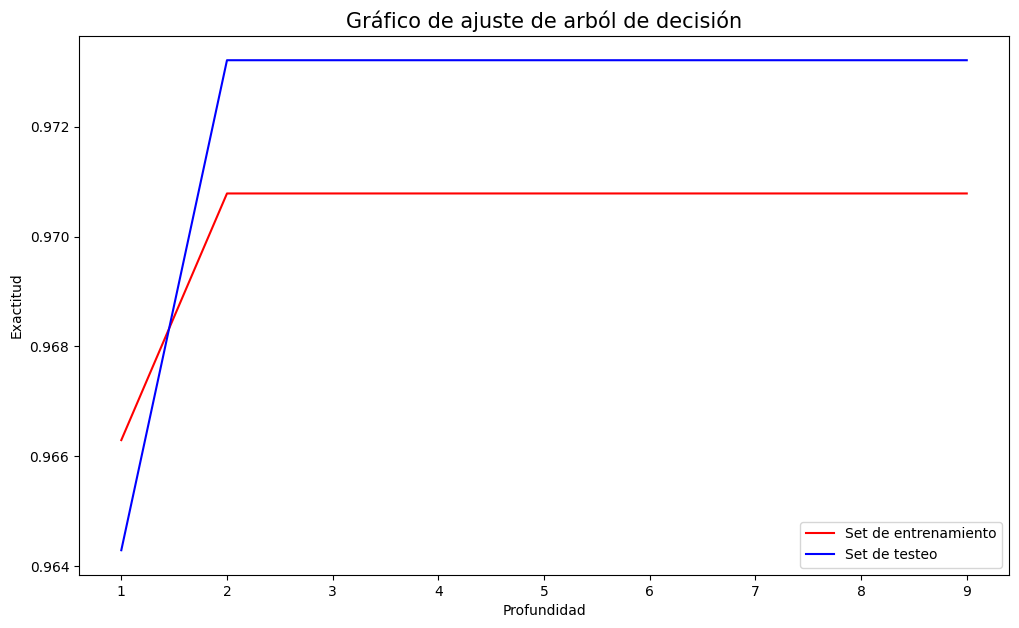

In [366]:
train_prec = []
test_prec = []
max_pairs = list(range(1, 10))

for n in max_pairs:
    clfx = DecisionTreeClassifier(max_depth=n, criterion='gini', class_weight={0: 1, 1: 5})
    clfx.fit(X_train, y_train)
    train_prec.append(clfx.score(X_train, y_train))
    test_prec.append(clfx.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_pairs, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_pairs, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de árbol de decisión', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()    

In [367]:
clf = DecisionTreeClassifier(max_depth = 2, criterion='gini', class_weight={0: 1, 1: 5}) 

In [368]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=2)

In [369]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [370]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Creamos la matriz de confusión 
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Visualizamos
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


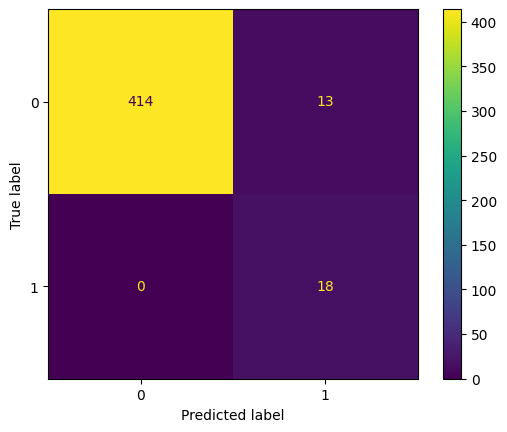

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      0.97      0.98       427
           1       0.58      1.00      0.73        18

    accuracy                           0.97       445
   macro avg       0.79      0.98      0.86       445
weighted avg       0.98      0.97      0.97       445



In [371]:
from sklearn.metrics import classification_report

cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

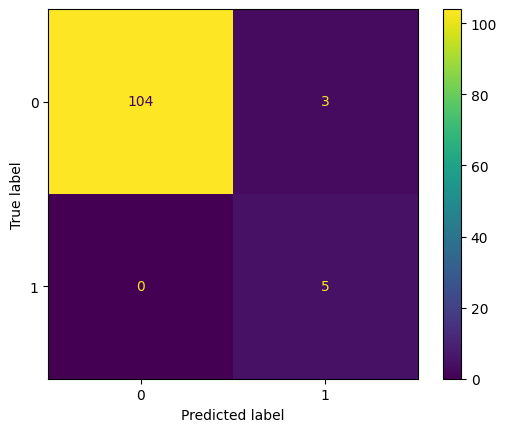

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      0.97      0.99       107
           1       0.62      1.00      0.77         5

    accuracy                           0.97       112
   macro avg       0.81      0.99      0.88       112
weighted avg       0.98      0.97      0.98       112



In [372]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [373]:
scores_arbol = cross_validate(clf, X, y, cv = 10, verbose = True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [374]:
print(scores_arbol["test_score"])

[0.94642857 1.         1.         1.         1.         0.94642857
 0.94642857 0.96363636 0.94545455 0.96363636]


In [375]:
feature_names = list(X.columns)
importances = clf.feature_importances_

# Imprime los nombres de los features junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

FIEBRE: 0.8365313299217835
ITU: 0.010468676511653407
SEPSIS: 0.15299999356656316
